In [1]:
from differentiable_lensing import DifferentiableLensing
import torch
import matplotlib.pyplot as plt

downscale_fraction = 4
grid_shape = 256//downscale_fraction
lensing_module = DifferentiableLensing('cpu', target_resolution=0.101*downscale_fraction, target_shape=grid_shape, alpha=None)
alpha_r = 3
_, _, theta_x_log, theta_y_log = lensing_module.make_log_grid(-0.101*downscale_fraction * grid_shape / 2.0, 0.101*downscale_fraction * grid_shape / 2.0, grid_shape)
theta_x_log, theta_y_log = theta_x_log.unsqueeze(0), theta_y_log.unsqueeze(0)
alpha = lensing_module.construct_sis(theta_x_log, theta_y_log, alpha_r)
beta_x, beta_y = lensing_module.forward_lensing(theta_x_log, theta_y_log, alpha)

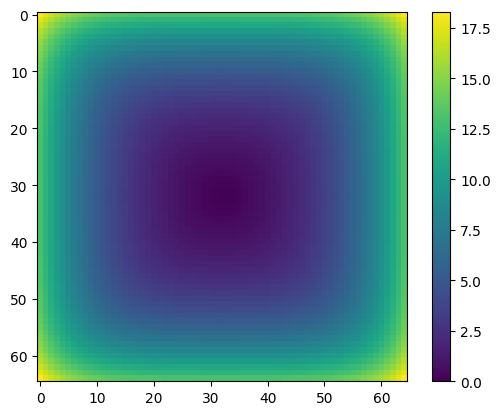

In [2]:
theta_r_log = (theta_x_log**2 + theta_y_log**2).sqrt()
plt.imshow(theta_r_log[0])
plt.colorbar()
theta_x_log, theta_y_log = theta_x_log[0], theta_y_log[0]

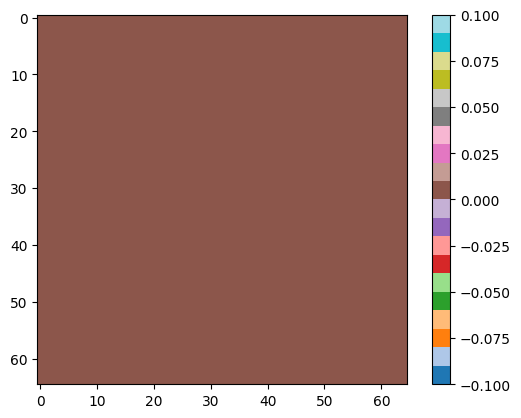

In [3]:
theta_r_log_flip = theta_r_log.flip(dims=[-1])
theta_r_log_flip_2 = theta_r_log.flip(dims=[-2])
plt.imshow((theta_r_log_flip[0] - theta_r_log[0]).abs() + (theta_r_log_flip_2[0] - theta_r_log[0]).abs(), cmap='tab20')
plt.colorbar()

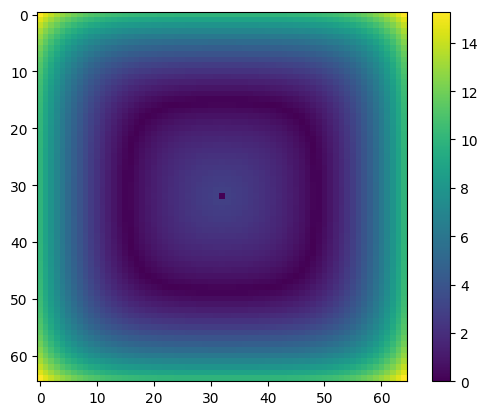

In [4]:
beta_r = (beta_x**2 + beta_y**2).sqrt()
plt.imshow(beta_r[0])
plt.colorbar()

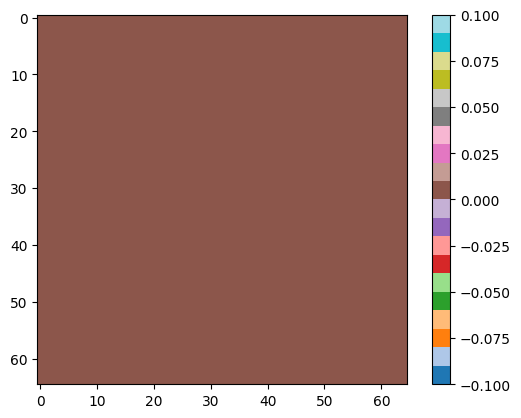

In [5]:
beta_r_flip = beta_r.flip(dims=[-1])
beta_r_flip_2 = beta_r.flip(dims=[-2])
plt.imshow((beta_r_flip[0] - beta_r[0]).abs() + (beta_r_flip_2[0] - beta_r[0]).abs(), cmap='tab20')
plt.colorbar()

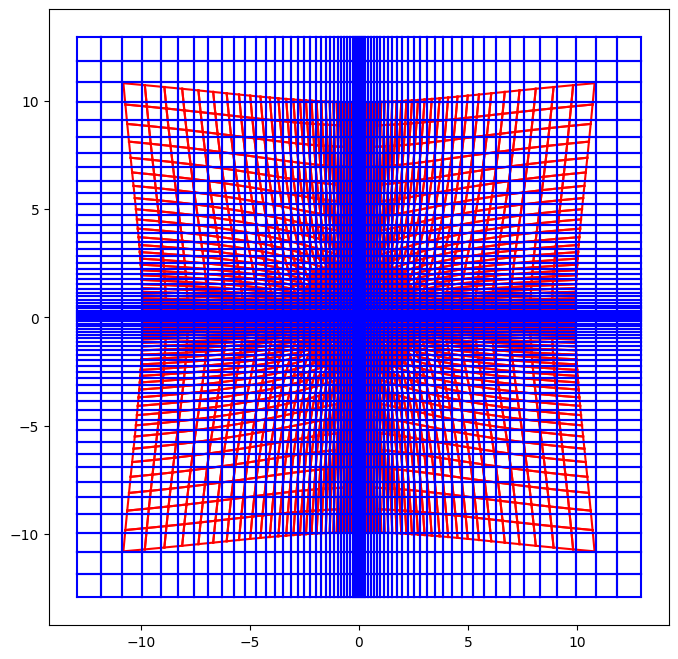

In [6]:
plot, axes = plt.subplots(1,1)
plot.set_size_inches(8, 8)
beta_x, beta_y = beta_x[0], beta_y[0]
axes.plot([beta_x[1:, :-1].flatten(), beta_x[1:, 1:].flatten()], [beta_y[1:, :-1].flatten(), beta_y[1:, 1:].flatten()], c='red')
axes.plot([beta_x[1:, 1:].flatten(), beta_x[:-1, 1:].flatten()], [beta_y[1:, 1:].flatten(), beta_y[:-1, 1:].flatten()], c='red')
axes.plot([beta_x[:-1, 1:].flatten(), beta_x[:-1, :-1].flatten()], [beta_y[:-1, 1:].flatten(), beta_y[:-1, :-1].flatten()], c='red')
axes.plot([beta_x[:-1, :-1].flatten(), beta_x[1:, :-1].flatten()], [beta_y[:-1, :-1].flatten(), beta_y[1:, :-1].flatten()], c='red')

axes.plot([theta_x_log[1:, :-1].flatten(), theta_x_log[1:, 1:].flatten()], [theta_y_log[1:, :-1].flatten(), theta_y_log[1:, 1:].flatten()], c='blue')
axes.plot([theta_x_log[1:, 1:].flatten(), theta_x_log[:-1, 1:].flatten()], [theta_y_log[1:, 1:].flatten(), theta_y_log[:-1, 1:].flatten()], c='blue')
axes.plot([theta_x_log[:-1, 1:].flatten(), theta_x_log[:-1, :-1].flatten()], [theta_y_log[:-1, 1:].flatten(), theta_y_log[:-1, :-1].flatten()], c='blue')
axes.plot([theta_x_log[:-1, :-1].flatten(), theta_x_log[1:, :-1].flatten()], [theta_y_log[:-1, :-1].flatten(), theta_y_log[1:, :-1].flatten()], c='blue')

print()

In [7]:
grid_fracs = lensing_module.log_grid_crop(theta_x_log, theta_y_log, beta_x, beta_y)

Iterating through axis-oriented grid rows:   0%|          | 0/64 [00:00<?, ?it/s]

Iterating through axis-oriented grid rows: 100%|██████████| 64/64 [21:14<00:00, 19.91s/it]


In [8]:
As = lensing_module.nsq_As(beta_x, beta_y)
M, shape = lensing_module.build_sparse_mapping(grid_fracs, As, 'cpu')
torch.save(M, 'backward_from_log.pt')